# <center>A Quantitative Analysis of Global Gazetteers</center>
## <center>Computation and Comparison of Marine Feature Coverages</center>
#### <center>by Gregory Biland, Diego Gomes, Aiyana Signer & Tao Peng</center>

***
***

In this notebook, we demonstrate our programme for performing a kernel density estimation based on place name coordinates from the two global gazetteers GeoNames and MarineRegions. This work is based on the methods described in Acheson et al. (2017).

***
***
## First Things First
***

### Modules

#### Installing external modules:

To run the code you will need to install the following packages:

In [1]:
# NumPy – For math operations on arrays
# (used in discoball.py)
# -------------------------------------

# !pip install numpy

In [2]:
# Pillow – For creating PNG files
# (used in discoball.py)
# -------------------------------

# !pip install Pillow

In [3]:
# tqdm – For displaying a progress bar
# (used in discoball.py)
# ------------------------------------

# !pip install tqdm

In [4]:
# IPython – For displaying PNG files in a Jupyter NB
# (used in this Notebook)
# --------------------------------------------------

# !pip install ipython

#### Standard library modules:

The following modules from the standard library are used:

In [5]:
# json – For encoding and decoding JSON files
# (used in both discoball.py and this Notebook)
# ---------------------------------------------


In [6]:
# os.path – For pathname existence checking
# (used in this Notebook)
# -----------------------------------------


#### Importing required modules:

In [7]:
# Standard & external modules
# ---------------------------

import json
import os.path
from IPython.display import Image, display

In [8]:
# Custom module developed for this project
# (disoball.py)
# ----------------------------------------

from discoball import Point, DiscoBall

***
### Documentation of the [discoball module](https://github.com/grbiuzh/GEO877/blob/main/discoball.py):

Our code has been extensively documented. To receive more details on a class or class method the ``help()`` method can be called with the respective object.

##### Class: Point

The ``Point`` class was created to facilitate easier handling of data points.

In [9]:
# Help for the class Point and all its public methods
# ---------------------------------------------------

help(Point)

Help on class Point in module discoball:

class Point(builtins.object)
 |  Point(lon=None, lat=None)
 |  
 |  A class to represent a point feature using its coordinates
 |  
 |  Args:
 |      lon (float): Longitude of point feature
 |      lat (float): Latitude of point feature
 |  
 |  Attributes:
 |      lon (float): Longitude of point feature
 |      lat (float): Latitude of point feature
 |  
 |  Methods defined here:
 |  
 |  __init__(self, lon=None, lat=None)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  distance(self, other)
 |      Calculate distance to another Point object using the Haversine formula
 |      
 |      Args:
 |          other (Point): Point object to which to compute the distance
 |      
 |      Returns:
 |          distance (float): Distance to the other Point object
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined he

##### Class: DiscoBall

The ``DiscoBall`` class is the main product of this work. A detailed description of the code and its functionalities is provided in the final report.

In [10]:
# Help for the class DiscoBall and all its public methods
# ---------------------------------------------------

help(DiscoBall)

Help on class DiscoBall in module discoball:

class DiscoBall(builtins.object)
 |  DiscoBall(res=100)
 |  
 |  A class to create a spherical raster with equal area cells
 |  
 |  Args:
 |      res (int/float): Resolution of raster, defined as pixel size (km2)
 |  
 |  Attributes:
 |      sphere_radius (int): Radius of the earth
 |      sphere_area (float): Total surface area of the earth
 |      sphere_circumference (float): Max circumference of the earth (Equator)
 |      resolution_km (int/float): Resolution of raster, defined as pixel size (km2)
 |      resolution_deg (int/float): Resolution of raster, defined as pixel size (degrees)
 |      n_lat (int): Number of latitudinal subdivisions of raster (number of rows)
 |      n_lon (int): Number of longitudinal subdivisions of raster (at the Equator)
 |      cell_height (float): Equal latitudinal size (height) of all raster cells (degrees)
 |      key (list): A list containing a decoding key (dict) for each row of the raster (from sout

***
***
## Running the Code

***
### Precomputed Version

Because the calculation of the kernel density estimation (KDE) at high resolution requires a lot of computing power, the code was designed so that the density layers can be saved and called up again at a later time. The density layers have already been calculated and are accessible in the current directory using a resolution of ``10 km`` and varying search radii:

Search Radius | All Features | Bays | Islands | Seamounts
:-----:|:-----:|:-----:|:-----:|:-----:
**15 km**|*yes*|*yes*|*yes*|*yes*
**150 km**|*yes*|*yes*|*yes*|*yes*
**300 km**|*no*|*yes*|*yes*|*yes*

To avoid long computing times, please use one of the configurations from the table above (``res = 10`` and ``sr = 15`` or ``sr = 150``) to run the following code blocks. This will result in the code reading in a precomputed density file and skipping the KDE computation.

*(Note: If you want to excecute the KDE computation yourself, you may do so further down in this Notebook, where we prepared some code blocks for another subset of the data, which takes less time to run)*

***
#### Example 1: All Features at High Resolution

In [11]:
# Defining the parameters
# -----------------------

res = 10    # Raster resolution [km2]
sr = 15     # Kernel density search radius [km2]

***
##### GeoNames

In [12]:
# Creating an empty raster
# ------------------------

geonames_all = DiscoBall(res=res)

In [13]:
# Print raster details
# --------------------

print(geonames_all)

Disco Ball Raster:

Number of cells:        5091966
Number of rows:         2000
Mean area of cells:     100.17 km2
SD of area of cells:    0.03 km2


In [14]:
# Load boundary data
# ------------------

geonames_all.load_boundaries('data\ocean_borders.geojson')

Boundaries loaded: data\ocean_borders.geojson


In [15]:
# Creating or loading the density layer into the raster
# -----------------------------------------------------

# First check if precomputed layer is available
if os.path.exists(f'computed_layers\geonames_all_RES{res}_SR{sr}.txt'):    
    geonames_all.load_layer('density', f'computed_layers\geonames_all_RES{res}_SR{sr}.txt')

# If not, add point data set to the raster, compute kernel density and save layer    
else:
    geonames_all.add_multiple_points_to_raster('data\point_datasets\GeoNames_all_points.json')    
    geonames_all.compute_point_density_layer(sr)
    geonames_all.save_layer('density', f'computed_layers\geonames_all_RES{res}_SR{sr}.txt')

Layer loaded: computed_layers\geonames_all_RES10_SR15.txt


In [16]:
# Classify density layer into 5 classes and save classification parameters for later
# ----------------------------------------------------------------------------------

geonames_all_bins = geonames_all.classify_layer('density', 5)

In [17]:
# Project the 3D raster onto 2D and create a PNG image
# ----------------------------------------------------

geonames_all.create_image_from_layer('density_classified', f'maps\geonames_all_RES{res}_SR{sr}.png')

Image saved: maps\geonames_all_RES10_SR15.png


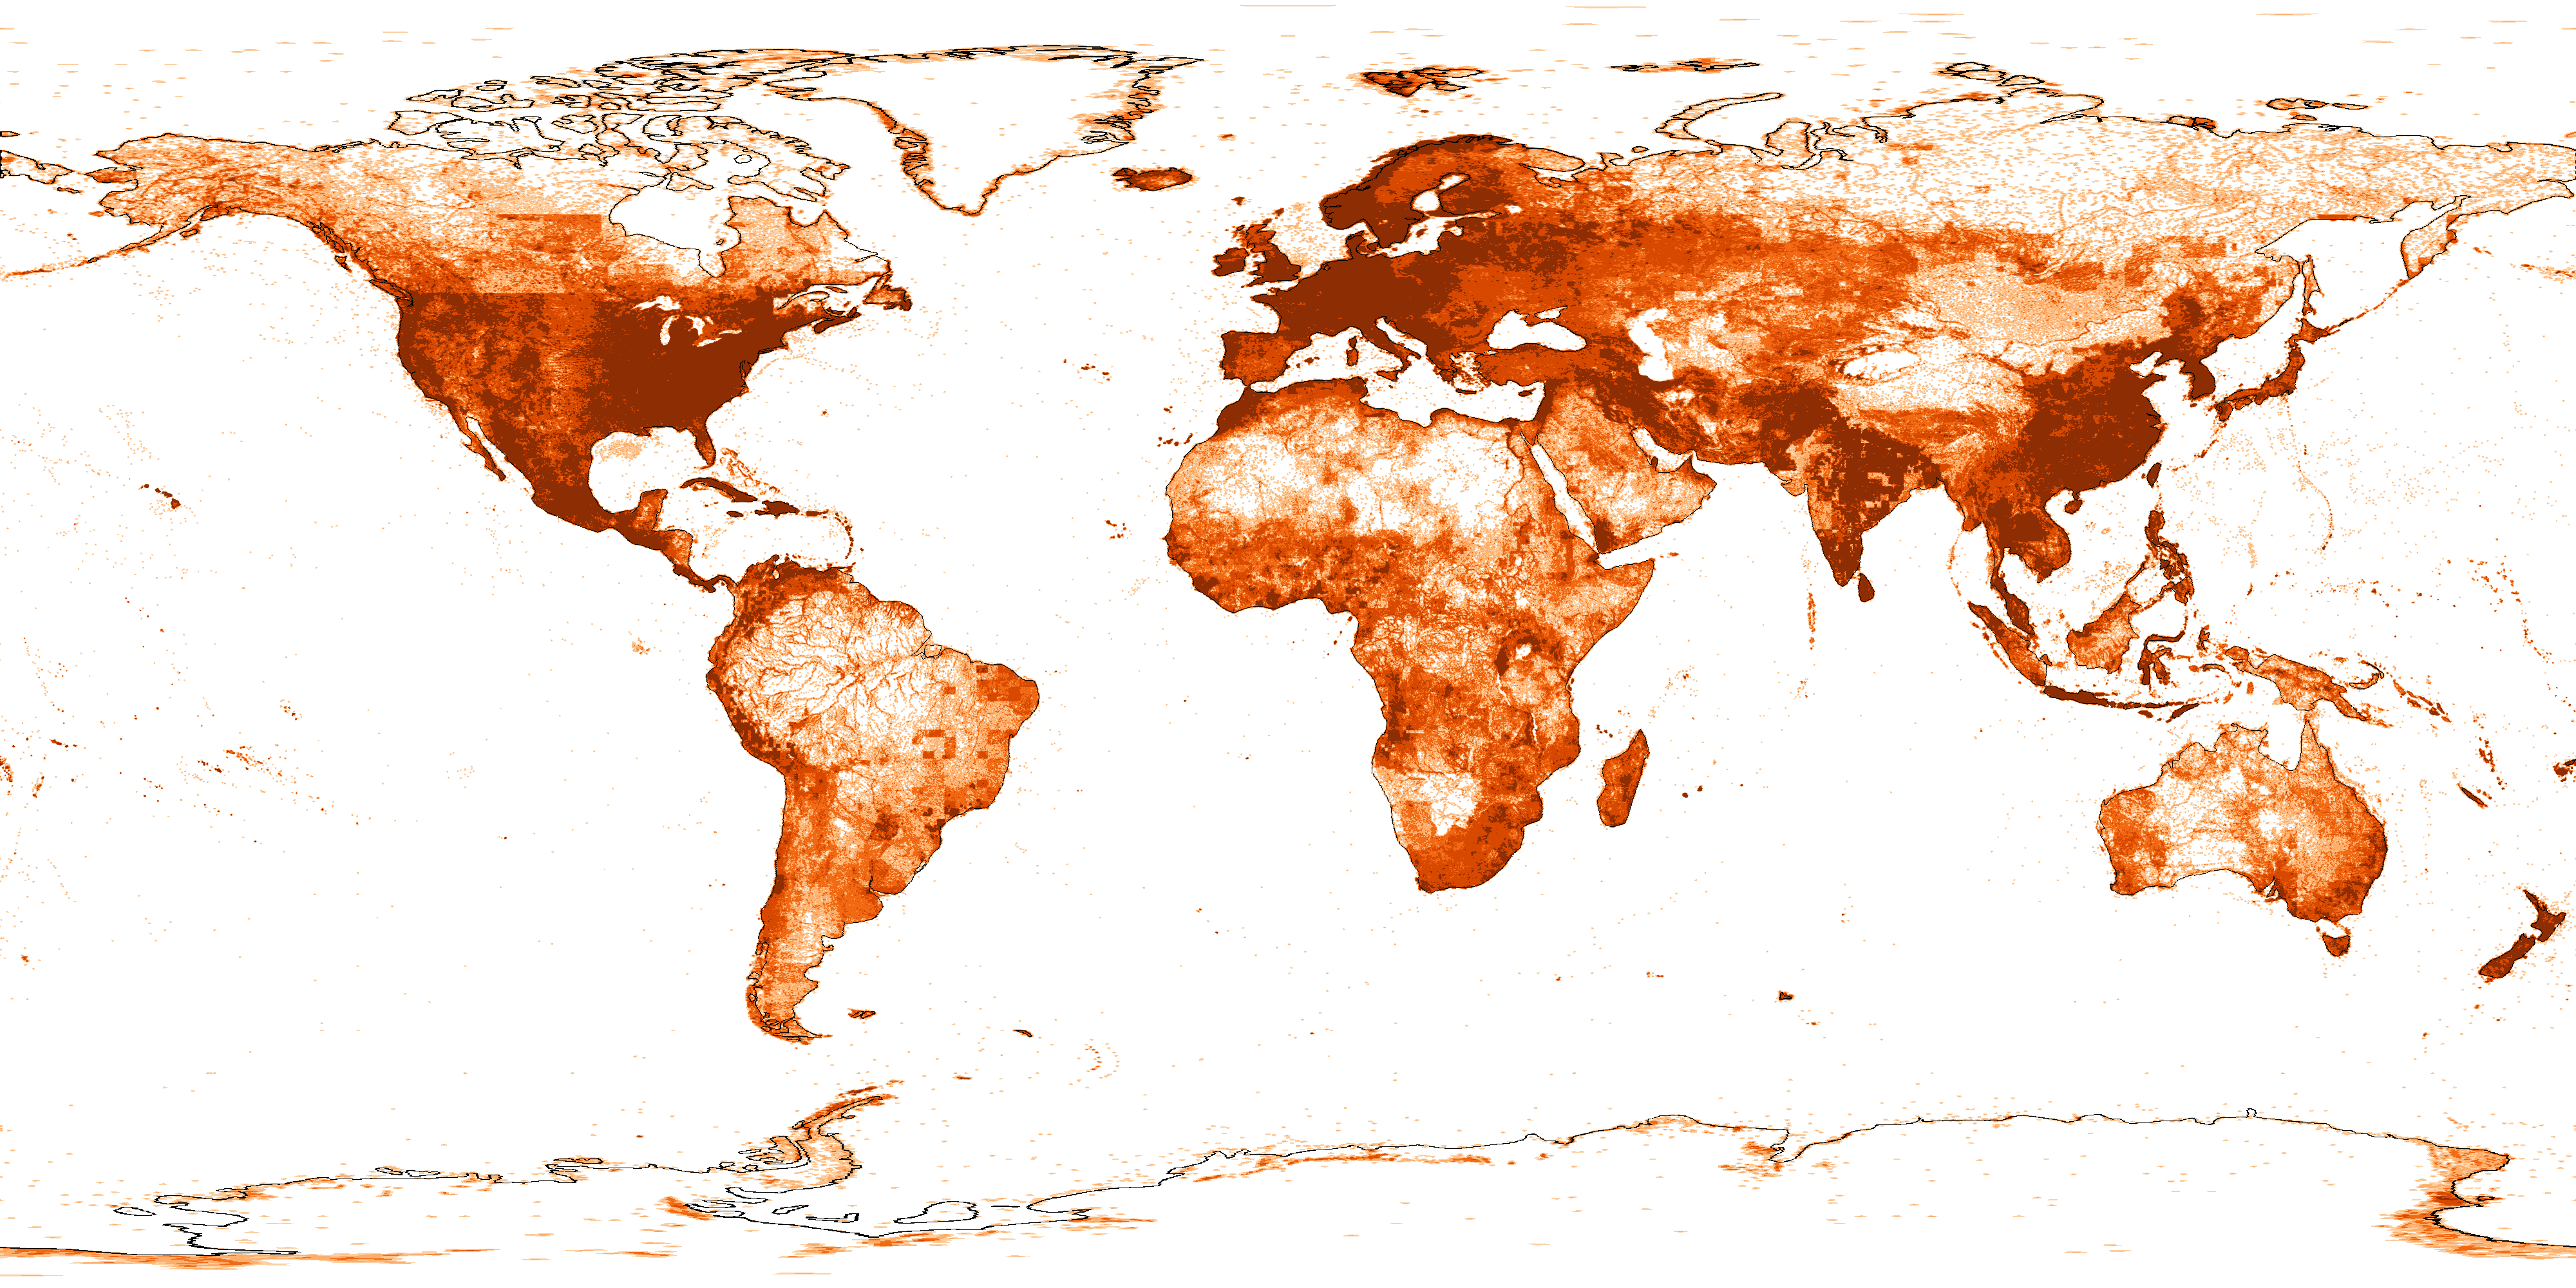

In [18]:
# Display the resulting image
# ---------------------------

display(Image(filename=f'maps\geonames_all_RES{res}_SR{sr}.png'))

***
##### MarineRegions

In [19]:
# Creating an empty raster
# ------------------------

marineregions_all = DiscoBall(res=res)

In [20]:
# Print raster details
# --------------------

print(marineregions_all)

Disco Ball Raster:

Number of cells:        5091966
Number of rows:         2000
Mean area of cells:     100.17 km2
SD of area of cells:    0.03 km2


In [21]:
# Load boundary data
# ------------------

marineregions_all.load_boundaries('data\ocean_borders.geojson')

Boundaries loaded: data\ocean_borders.geojson


In [22]:
# Creating or loading the density layer into the raster
# -----------------------------------------------------

# First check if precomputed layer is available
if os.path.exists(f'computed_layers\geonames_all_RES{res}_SR{sr}.txt'):    
    marineregions_all.load_layer('density', f'computed_layers\marineregions_all_RES{res}_SR{sr}.txt')

# If not, add point data set to the raster, compute kernel density and save layer    
else:
    marineregions_all.add_multiple_points_to_raster('data\point_datasets\MarineRegions_all_points.json')    
    marineregions_all.compute_point_density_layer(sr)
    marineregions_all.save_layer('density', f'computed_layers\marineregions_all_RES{res}_SR{sr}.txt')

Layer loaded: computed_layers\marineregions_all_RES10_SR15.txt


In [23]:
# Classify density layer into 5 classes using the GeoNames classification parameters
# ----------------------------------------------------------------------------------

legend_bins = marineregions_all.classify_layer('density', 5, bins=geonames_all_bins)

In [24]:
# Project the 3D raster onto 2D and create a PNG image
# ----------------------------------------------------

marineregions_all.create_image_from_layer('density_classified', f'maps\marineregions_all_RES{res}_SR{sr}.png')

Image saved: maps\marineregions_all_RES10_SR15.png


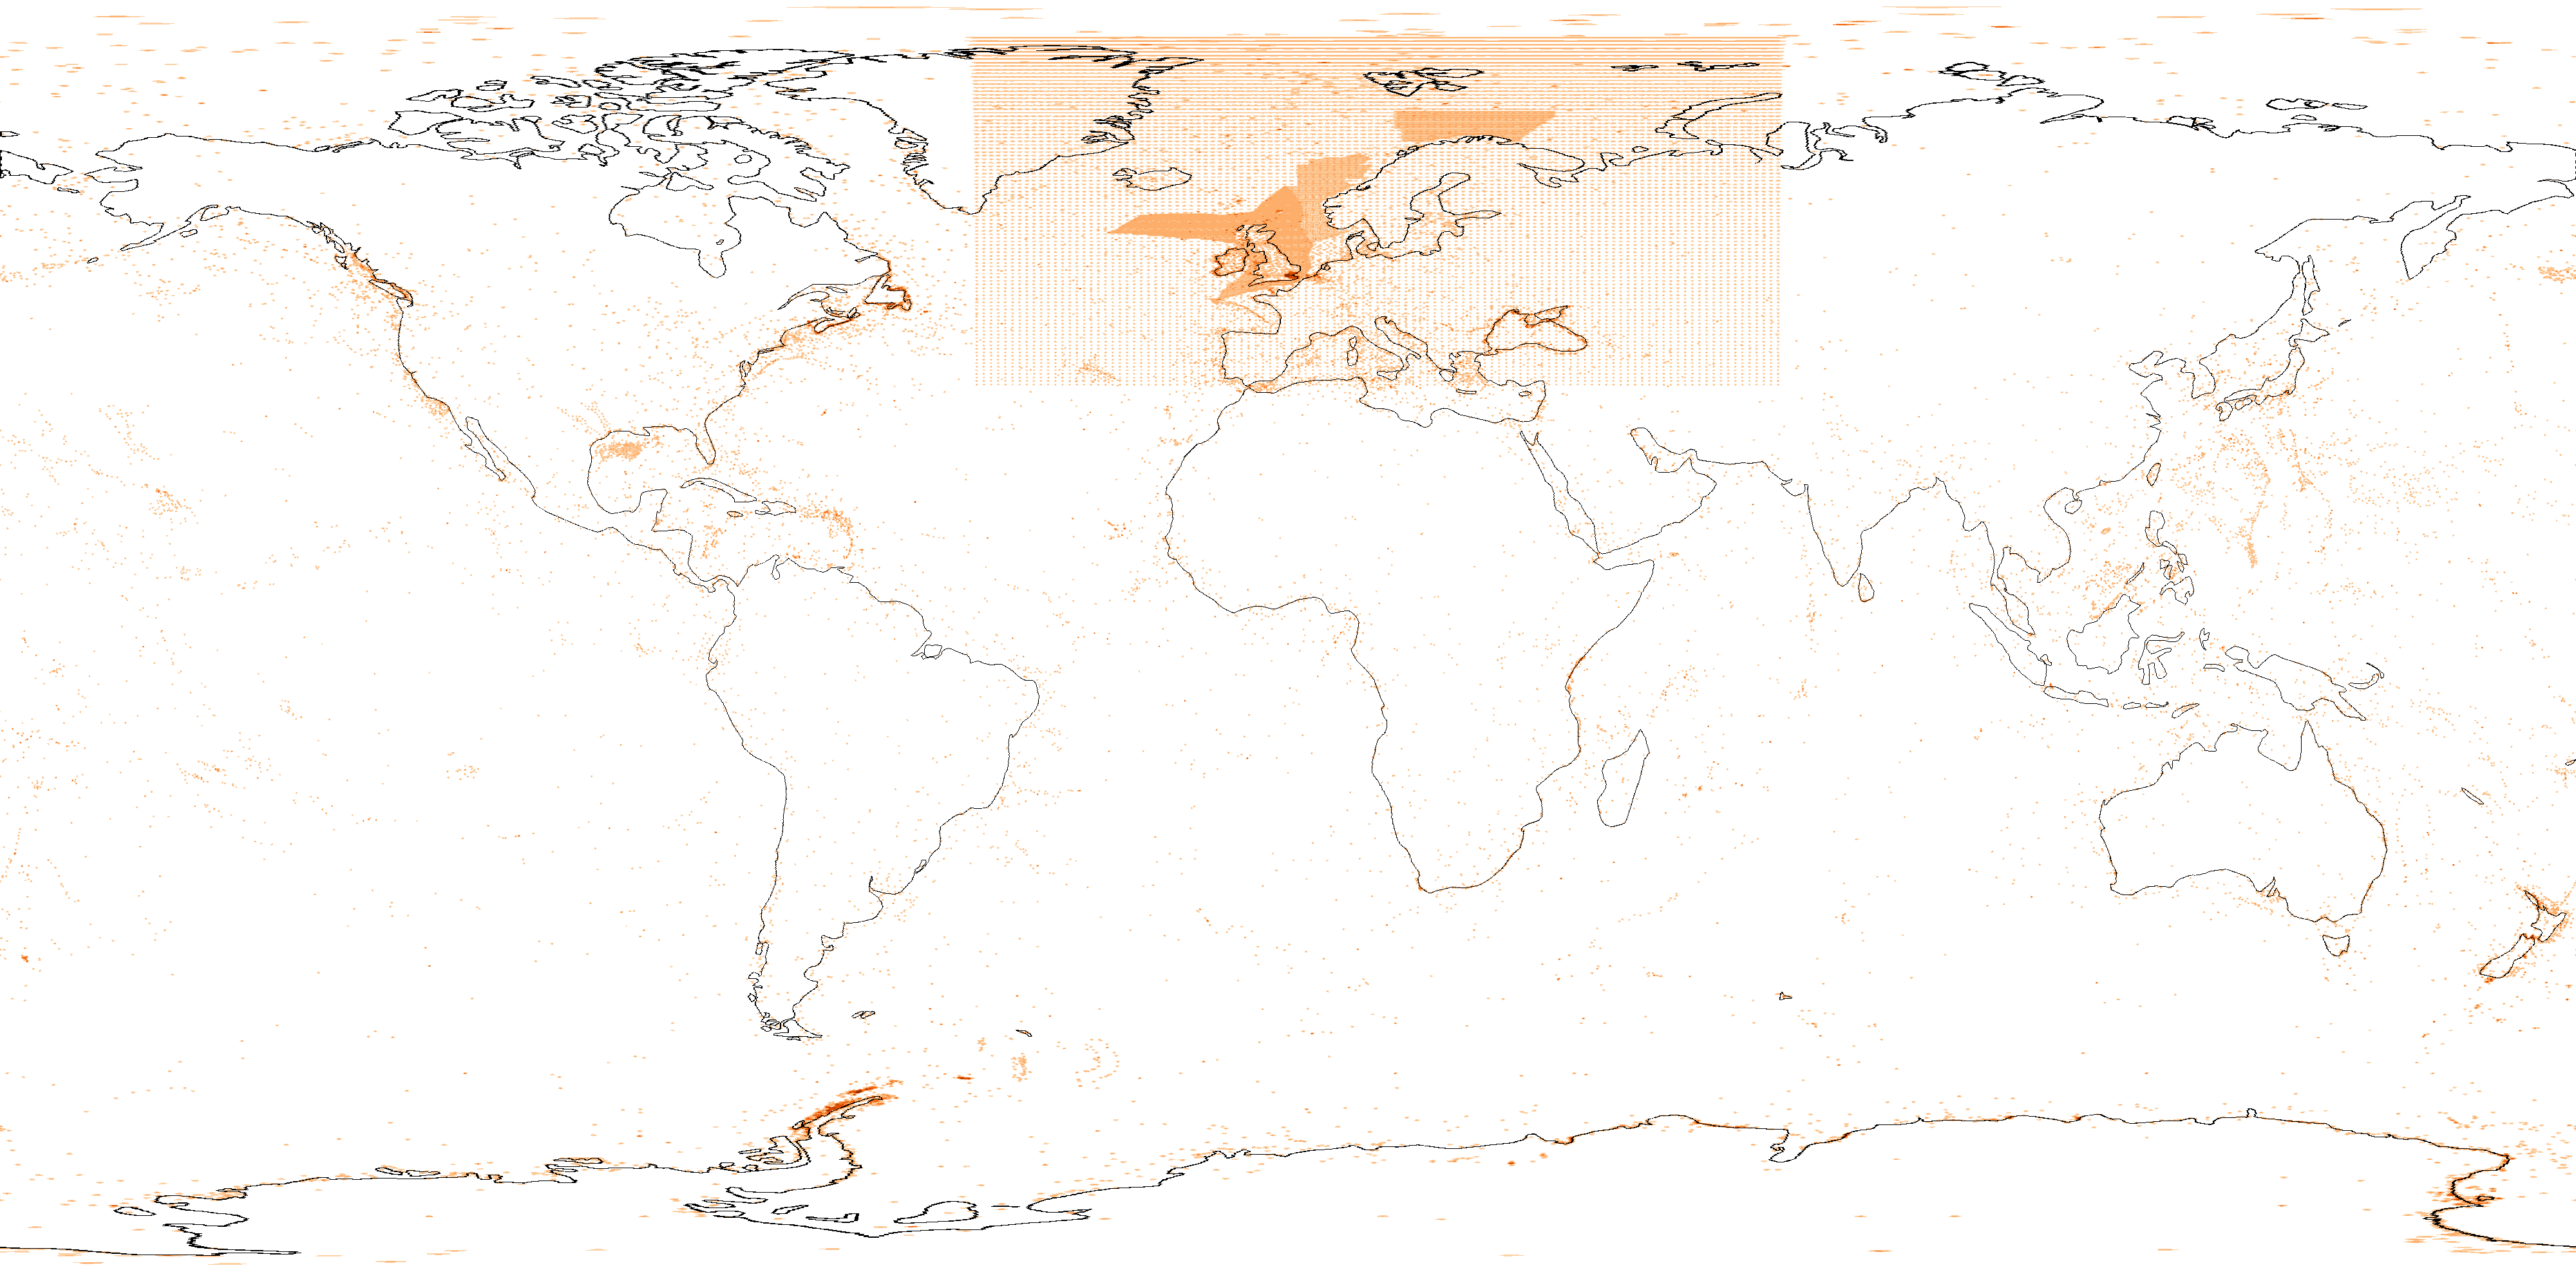

In [25]:
# Display the resulting image
# ---------------------------

display(Image(filename=f'maps\marineregions_all_RES{res}_SR{sr}.png'))

***
##### Color Legend

In [26]:
# Print color legend bins
# -----------------------

print(f'Color legend bins: {legend_bins}')

Color legend bins: [8.054683800809577e-13, 0.0034987012654115117, 0.01246981063130211, 0.03644488049211346, 0.11993670511703582, 22.4771445264547]


***
### Non-precomputed Version

In this section you may try out your own resolution and search radius configurations. We selected to configure the code blocks for the seamounts features, as those have the smallest data sets and thus take the least amount of computing time. The configuration ``res = 100`` and ``sr = 100`` should not take more than a few seconds to compute on a regular laptop. You may increase the resolution to get a more detailed result or decrease it to reduce computing times. You may also tweak the search radius, according the desired smoothness of the result.


***
#### Example 2: Seamounts Features at Low Resolution (DIY)

In [ ]:
# Defining the parameters
# -----------------------

res = 100    # Raster resolution [km2]
sr = 100     # Kernel density search radius [km2]

***
##### GeoNames

In [ ]:
# Creating an empty raster
# ------------------------

geonames_seamounts = DiscoBall(res=res)

In [ ]:
# Print raster details
# --------------------

print(geonames_seamounts)

In [ ]:
# Load boundary data
# ------------------

geonames_seamounts.load_boundaries('data\ocean_borders.geojson')

In [ ]:
# Creating or loading the density layer into the raster
# -----------------------------------------------------

# First check if precomputed layer is available
if os.path.exists(f'computed_layers\geonames_seamounts_RES{res}_SR{sr}.txt'):    
    geonames_seamounts.load_layer('density', f'computed_layers\geonames_seamounts_RES{res}_SR{sr}.txt')

# If not, add point data set to the raster, compute point density and save layer    
else:
    geonames_seamounts.add_multiple_points_to_raster('data\point_datasets\GeoNames_classed_points.json', key='Seamount(s)')    
    geonames_seamounts.compute_point_density_layer(sr)
    geonames_seamounts.save_layer('density', f'computed_layers\geonames_seamounts_RES{res}_SR{sr}.txt')

In [ ]:
# Classify density layer into 5 classes and save classification parameters for later
# ----------------------------------------------------------------------------------

geonames_seamounts_bins = geonames_seamounts.classify_layer('density', 5)

In [ ]:
# Project the 3D raster onto 2D and create a PNG image
# ----------------------------------------------------

geonames_seamounts.create_image_from_layer('density_classified', f'maps\geonames_seamounts_RES{res}_SR{sr}.png')

In [ ]:
# Display the resulting image
# ---------------------------

display(Image(filename=f'maps\geonames_seamounts_RES{res}_SR{sr}.png'))

***
##### MarineRegions

In [ ]:
# Creating an empty raster
# ------------------------

marineregions_seamounts = DiscoBall(res=res)

In [ ]:
# Print raster details
# --------------------

print(marineregions_seamounts)

In [ ]:
# Load boundary data
# ------------------

marineregions_seamounts.load_boundaries('data\ocean_borders.geojson')

In [ ]:
# Creating or loading the density layer into the raster
# -----------------------------------------------------

# First check if precomputed layer is available
if os.path.exists(f'computed_layers\marineregions_seamounts_RES{res}_SR{sr}.txt'):    
    marineregions_seamounts.load_layer('density', f'computed_layers\marineregions_seamounts_RES{res}_SR{sr}.txt')

# If not, add point data set to the raster, compute point density and save layer    
else:
    marineregions_seamounts.add_multiple_points_to_raster('data\point_datasets\MarineRegions_classed_points.json', key='Seamount(s)')    
    marineregions_seamounts.compute_point_density_layer(sr)
    marineregions_seamounts.save_layer('density', f'computed_layers\marineregions_seamounts_RES{res}_SR{sr}.txt')

In [ ]:
# Classify density layer into 5 classes using the GeoNames classification parameters
# ----------------------------------------------------------------------------------

legend_bins = marineregions_seamounts.classify_layer('density', 5, bins=geonames_seamounts_bins)

In [ ]:
# Project the 3D raster onto 2D and create a PNG image
# ----------------------------------------------------

marineregions_seamounts.create_image_from_layer('density_classified', f'maps\marineregions_seamounts_RES{res}_SR{sr}.png')

In [ ]:
# Display the resulting image
# ---------------------------

display(Image(filename=f'maps\marineregions_seamounts_RES{res}_SR{sr}.png'))

***
##### Color Legend

In [ ]:
# Print color legend bins
# -----------------------

print(f'Color legend bins: {legend_bins}')